In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, scipy.stats as stats
%matplotlib inline
import pylab, os, pydotplus, warnings, statsmodels.api as sm, itertools
import statsmodels.formula.api as smf, statsmodels.stats.api as sms, statsmodels.tsa.api as smt
from scipy import stats
from math import sqrt
from sklearn import linear_model, metrics, preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import ttest_1samp
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
from sklearn.externals.six import StringIO
from mlxtend.feature_selection import sequential_feature_selector, SequentialFeatureSelector as sfs
from mlxtend.evaluate import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from vecstack import stacking
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from mlxtend.classifier import StackingClassifier
from sklearn import svm #support vector Machine
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
color = sns.color_palette()
import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.decomposition import PCA

C:\Users\gsati\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
train = pd.read_csv('Training Data Set_N.csv')
test = pd.read_csv('Test Data Set.csv')

In [3]:
print(train.shape)
test.shape

(53515, 17)


(5615, 16)

In [4]:
train.head()

,Id,Maker,model,Location,distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


In [5]:
df_train = pd.read_csv('Training Data Set_N.csv')
df_test = pd.read_csv('Test Data Set.csv')

In [6]:
miss_percent = (df_train.isnull().sum() / len(df_train)) * 100
missing = pd.DataFrame({"percent":miss_percent, 'count':df_train.isnull().sum()}).sort_values(by="percent", ascending=False)
missing.loc[missing['percent'] > 0]


,percent,count
body_type,92.271326,49379
engine_power,2.688966,1439
distance,2.262917,1211


In [7]:
miss_percent = (df_test.isnull().sum() / len(df_test)) * 100
missing = pd.DataFrame({"percent":miss_percent, 'count':df_test.isnull().sum()}).sort_values(by="percent", ascending=False)
missing.loc[missing['percent'] > 0]

,percent,count
body_type,92.484417,5193
engine_power,2.991986,168
Distance,2.279608,128


In [8]:
df_train.Maker.value_counts()

skoda       21563
toyota       7840
audi         7326
bmw          7178
nissan       5485
hyundai      2240
fiat         1845
maserati       38
Name: Maker, dtype: int64

In [12]:
df_train.engine_power.fillna(df_train.engine_power.median(), inplace=True)

In [15]:
df_train.distance.fillna(df_train.distance.mean(), inplace=True)

In [17]:
df_train.drop('body_type',1, inplace=True)

In [18]:
df_train.isna().sum()

Id                     0
Maker                  0
model                  0
Location               0
distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
Price                  0
dtype: int64

In [24]:
df_test.engine_power.fillna(df_test.engine_power.median(), inplace=True)
df_test['Distance '].fillna(df_test['Distance '].mean(), inplace=True)

In [25]:
df_test.drop('body_type',1, inplace=True)

In [26]:
df_test.isna().sum()

Id                     0
Maker                  0
model                  0
Location               0
Distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
dtype: int64

In [28]:
df_train["seat_count"]=df_train["seat_count"].replace("None",4)
df_train["seat_count"]=df_train["seat_count"].astype('int64')

df_train["door_count"]=df_train["door_count"].replace("None",4)
df_train["door_count"]=df_train["door_count"].astype('int64')

In [29]:
df_test["seat_count"]=df_test["seat_count"].replace("None",4)
df_test["seat_count"]=df_test["seat_count"].astype('int64')

df_test["door_count"]=df_test["door_count"].replace("None",4)
df_test["door_count"]=df_test["door_count"].astype('int64')

In [30]:
le=LabelEncoder()
df_train['Maker']=le.fit_transform(df_train['Maker']) 
df_train['model']=le.fit_transform(df_train['model']) 
df_train['Location']=le.fit_transform(df_train['Location']) 
df_train['Owner Type']=le.fit_transform(df_train['Owner Type']) 
df_train['transmission']=le.fit_transform(df_train['transmission']) 
df_train['fuel_type']=le.fit_transform(df_train['fuel_type']) 
df_train['door_count']=le.fit_transform(df_train['door_count'])
df_train['seat_count']=le.fit_transform(df_train['seat_count'])

In [45]:
df_test['model']=le.fit_transform(df_test['model'])
df_test['Owner Type']=le.fit_transform(df_test['Owner Type'])
df_test['transmission']=le.fit_transform(df_test['transmission'])
df_test['fuel_type']=le.fit_transform(df_test['fuel_type'])
df_test['Location']=le.fit_transform(df_test['Location'])
df_test['door_count']=le.fit_transform(df_test['door_count'])
df_test['seat_count']=le.fit_transform(df_test['seat_count'])
df_test['Maker']=le.fit_transform(df_test['Maker'])

In [56]:
y=df_train['Price']
X=df_train.drop(['Price','Id'],axis=1)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [33]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'\nR^2 score for test: {lin_reg.score(X_test, y_test)}')

R^2 score for train: 0.6897695888144928

R^2 score for test: 0.7137457321299727


In [34]:
Xc = sm.add_constant(X)
lin_reg = sm.OLS(y,Xc).fit()

In [37]:
X_bar = np.mean(X_train)
mu = np.mean(df_train)
sigma = np.std(df_train)
n = X_train.shape[0]
Z = (X_bar - mu)/(sigma/np.sqrt(n))
print('z_observed value is : ', Z)

z_observed value is :  Age of car             0.434197
Id                    -0.026844
Location              -0.363961
Maker                 -0.339653
Owner Type             0.341520
Price                       NaN
Vroom Audit Rating     0.298346
distance               0.367450
door_count             0.531935
engine_displacement   -0.132021
engine_power           0.451421
fuel_type             -0.195985
manufacture_year      -0.434197
model                 -0.506783
seat_count            -0.018848
transmission          -0.884870
dtype: float64


In [58]:
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
model = ensemble.GradientBoostingRegressor(**params)

model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [59]:
model_score = model.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('R2 sq: ',model_score)
y_predicted = model.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

print("RMSE:%.2f"% np.sqrt(mean_squared_error(y_test, y_predicted)))

R2 sq:  0.9130106222776109
Mean squared error: 47517468077.93
Test Variance score: 0.93
RMSE:217985.02


In [60]:
print(f'R^2 score for train: {model.score(X_train, y_train)}')
print(f'\nR^2 score for test: {model.score(X_test, y_test)}')

R^2 score for train: 0.9130106222776109

R^2 score for test: 0.9309548180659576


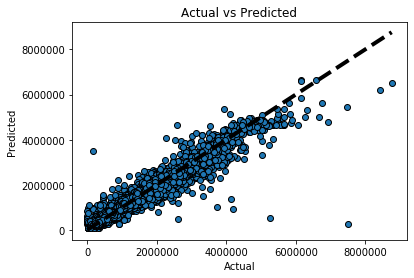

In [61]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

In [63]:
X=df_test.drop('Id',1)
y_pre=model.predict(X)

In [64]:
new= pd.DataFrame({'Unique Id': df_test.Id, 'Price': y_pre})
new.to_csv('sub2.csv')